In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns

## Loading the Iris dataset

In [29]:
dataset = sns.load_dataset('penguins')

feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset.dropna(subset=feature_names, inplace=True)

class_names = dataset['species'].unique()

X = dataset[feature_names]

# Y, class_names = dataset['species'].factorize()
Y = dataset['species']
class_names = dataset['species'].unique()

In [72]:
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [32]:
# Split data into a training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Visualising the Iris dataset

In [33]:
import seaborn as sns

In [34]:
feature_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

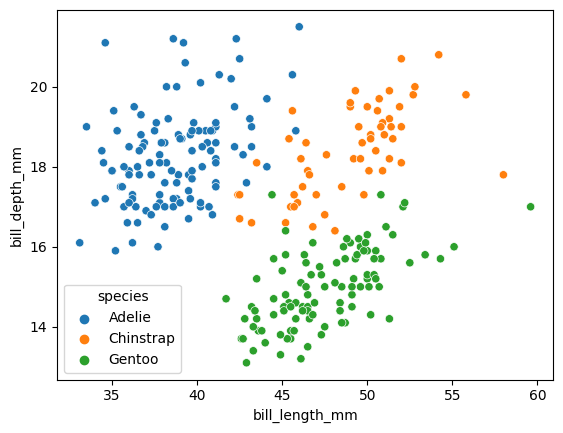

In [74]:
# Vary feature indices to show data from different perspectives - note that setosa is trivial to seperate
x = feature_names[0]
y = feature_names[1]

fig = sns.scatterplot(X_train, x=x, y=y, hue=dataset['species'])

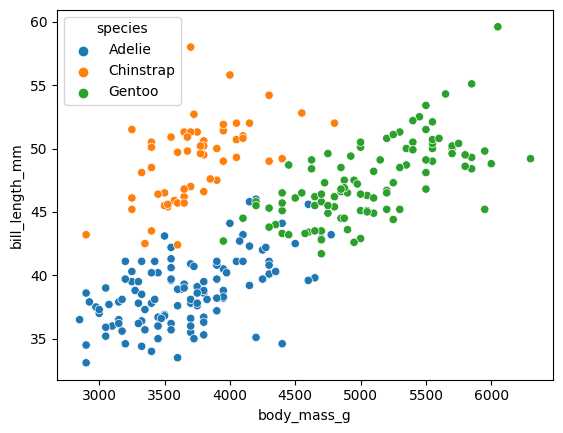

In [36]:
# Vary feature indices to show data from different perspectives - note that setosa is trivial to seperate
x = feature_names[3]
y = feature_names[0]

fig = sns.scatterplot(X_train, x=x, y=y, hue=dataset['species'])

## Decision tree classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [38]:
clf.score(X_test, y_test)

0.9710144927536232

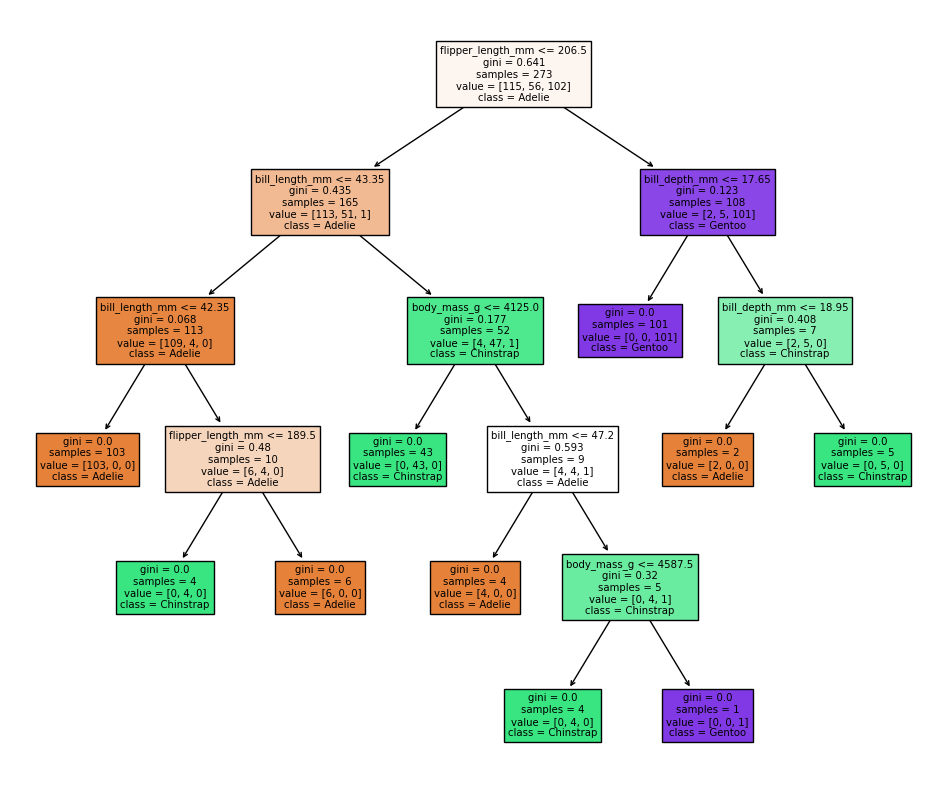

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())
plt.show()

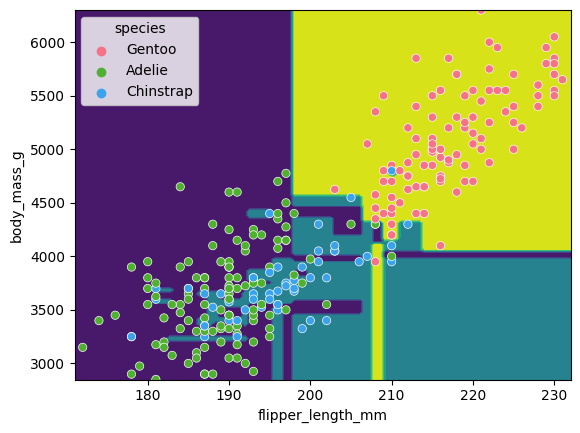

In [40]:
from sklearn.inspection import DecisionBoundaryDisplay

f1 = feature_names[2]
f2 = feature_names[3]

clf = DecisionTreeClassifier()
clf.fit(X_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, X_train[[f1, f2]])

# labels = [class_names[i] for i in y_train]
sns.scatterplot(X_train, x=f1, y=f2, hue=y_train, palette='husl')
plt.show()

In [41]:
from sklearn import svm
from sklearn import preprocessing

# For SVM - it's important that we normalise input, as features have different magnitudes.
# If we didn't do this, the model would only look at body mass (measured in 1000's of grams) and ignore bill length/depth (measured in 10's mm's)

scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train_scaled = pd.DataFrame(scalar.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns, index=X_test.index)

In [77]:
from sklearn import svm

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(X_train_scaled, y_train)

SVM.score(X_test_scaled, y_test)

0.9565217391304348

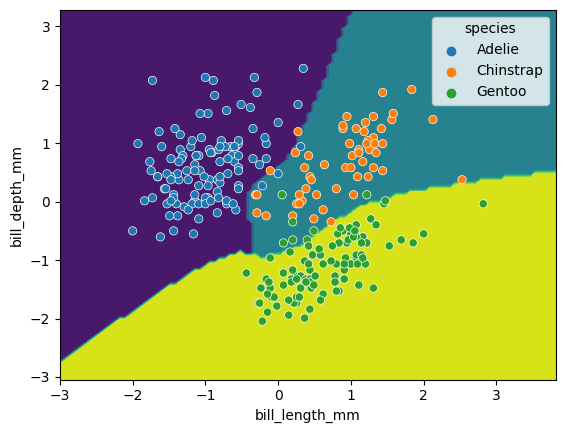

In [78]:
x2 = X_train_scaled[[feature_names[0], feature_names[1]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x2, y_train)

DecisionBoundaryDisplay.from_estimator(SVM, x2) #, ax=ax)
sns.scatterplot(x2, x=feature_names[0], y=feature_names[1], hue=dataset['species'])
plt.show()

In [17]:
# Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
# TODO - cross validation vs. feature count

## Tuning hyper-parameters

In [63]:
max_depths = [1, 2, 3, 4, 5]  # Would need more samples to go past 5
min_leafs = [1, 3, 5, 7, 9]

accuracy = []
for i, d in enumerate(max_depths):
    for j, m in enumerate(min_leafs):
        clf = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)

        accuracy.append((d, m, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'leaf_min', 'accuracy'])

In [65]:
max_depths = [1, 2, 3, 4, 5]  # Would need more samples to go past 5

accuracy = []
for i, d in enumerate(max_depths):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

Text(0, 0.5, 'Accuracy')

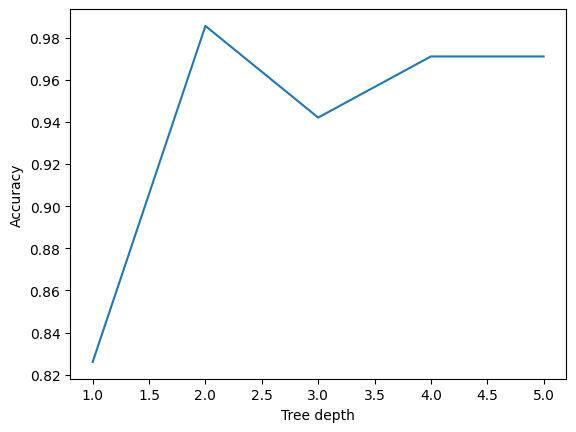

In [67]:
sns.lineplot(acc_df, x='depth', y='accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')

In [20]:
X_exp, X_val, y_exp, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_exp, y_exp, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
scores = cross_val_score(clf, X, Y, cv=5)

In [22]:
scores.mean()

0.9618499573742542

# For September
- Tune SVM hyper params as below - from this we'd pick D=3, C=1
- Use SVM to introduce cross-validation, use figure from https://scikit-learn.org/stable/modules/cross_validation.html in text
- Use validation split to test performance of SVM(3,1) vs. DC(2) from above to pick the best one

Note that the current code breaks the below if run in order - i.e.: y_train is the result of t/t/v splitting, not the original

In [23]:
## SVM hyper-parameter tuning

In [27]:
y_train

164    Chinstrap
189    Chinstrap
44        Adelie
234       Gentoo
1         Adelie
         ...    
166    Chinstrap
96        Adelie
271       Gentoo
312       Gentoo
188    Chinstrap
Name: species, Length: 218, dtype: object

In [44]:
from sklearn import svm

x2 = X_train_scaled[[feature_names[1], feature_names[3]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.2)
SVM.fit(x2, y_train)

SVC(C=1.2, kernel='poly')

In [61]:
Cs = np.linspace(0.2, 5.0, 20)
Degrees = [2, 3, 4, 5, 6]

scores = []
for C in Cs:
    for D in Degrees:
        clf = svm.SVC(kernel='poly', degree=D, C=C)
        # x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=0.2)
        # clf.fit(x1, y1)
        # scores.append((C, D, clf.score(x2, y2)))
        cv_scores = cross_val_score(clf, X_train_scaled, y_train)
        scores.append((C, D, cv_scores.mean()))
        
df = pd.DataFrame(scores, columns=['C', 'degree', 'accuracy'])

<Axes: xlabel='C', ylabel='accuracy'>

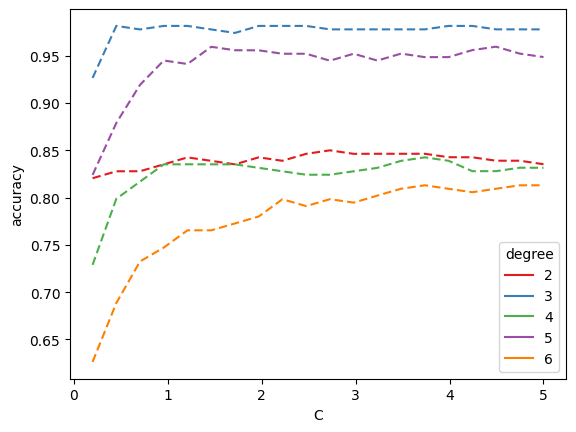

In [62]:
sns.lineplot(df, x='C', y='accuracy', hue='degree', dashes=[4, 2], palette='Set1')

In [52]:
clf = svm.SVC(kernel='poly', degree=3, C=1.0)
cross_val_score(clf, X_train_scaled, y_train)

array([0.98181818, 1.        , 0.98181818, 0.94444444, 1.        ])

In [57]:
clf = svm.SVC(kernel='poly', degree=2, C=1)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8695652173913043

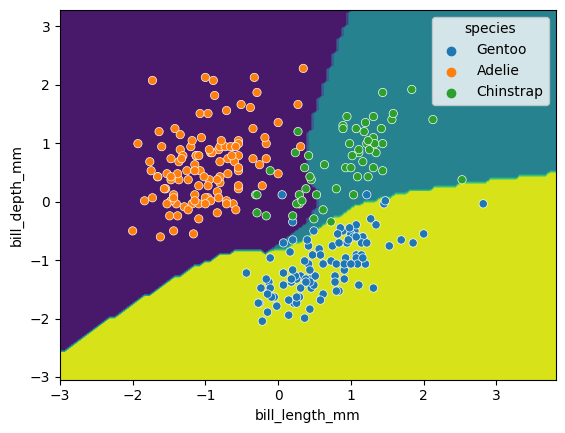

In [60]:
from sklearn import svm

x2 = X_train_scaled[[feature_names[0], feature_names[1]]]

SVM = svm.SVC(kernel='poly', degree=3, C=1)
SVM.fit(x2, y_train)

fig = plt.figure()
ax = fig.gca()
DecisionBoundaryDisplay.from_estimator(SVM, x2, ax=ax)
sns.scatterplot(x2, x=feature_names[0], y=feature_names[1], hue=y_train)
plt.show()